# Импортировать библиотеки и дасасет

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

penguins = sns.load_dataset('penguins')

penguins.sample(10)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
296,Gentoo,Biscoe,47.5,14.2,209.0,4600.0,Female
37,Adelie,Dream,42.2,18.5,180.0,3550.0,Female
40,Adelie,Dream,36.5,18.0,182.0,3150.0,Female
217,Chinstrap,Dream,49.6,18.2,193.0,3775.0,Male
293,Gentoo,Biscoe,46.5,14.8,217.0,5200.0,Female
95,Adelie,Dream,40.8,18.9,208.0,4300.0,Male
177,Chinstrap,Dream,52.0,19.0,197.0,4150.0,Male
170,Chinstrap,Dream,46.4,18.6,190.0,3450.0,Female
85,Adelie,Dream,41.3,20.3,194.0,3550.0,Male
235,Gentoo,Biscoe,49.3,15.7,217.0,5850.0,Male


In [8]:
penguins.shape

(344, 7)

In [10]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
# Проверяем количество строк, столбцов и типы данных
penguins.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# Основные статистики для числовых признаков
penguins.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# Проверка на пропущенные значения

In [ ]:
# Проверка на пропуски
penguins.isnull().sum()


,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [ ]:
# Удаление строк с пропущенными значениями
penguins_cleaned = penguins.dropna()

print(penguins_cleaned.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


# Визуализация данных

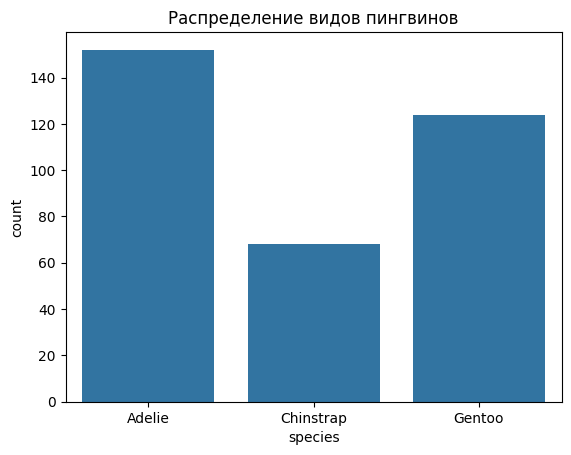

In [ ]:
sns.countplot(data=penguins, x='species')
plt.title('Распределение видов пингвинов')
plt.show()



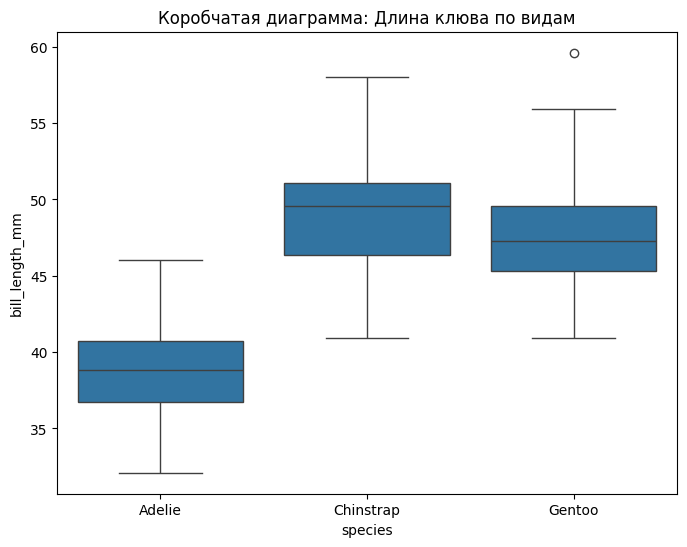

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='bill_length_mm', data=penguins)
plt.title('Коробчатая диаграмма: Длина клюва по видам')
plt.show()

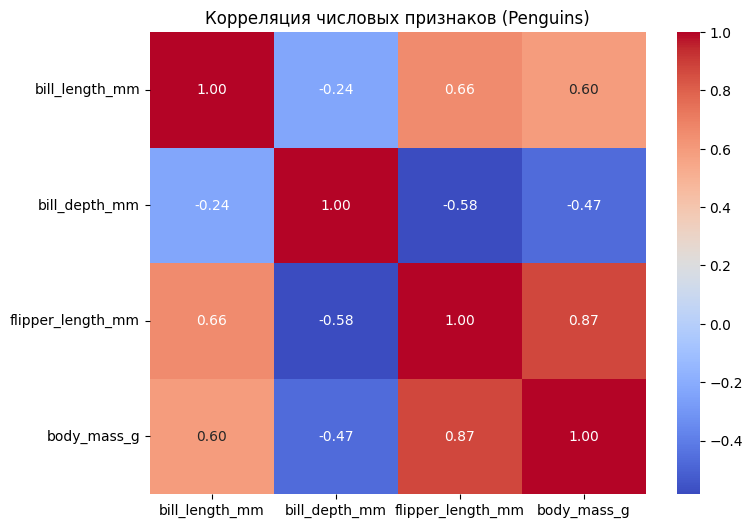

In [ ]:
numeric_data = penguins.select_dtypes(include='number')

# Вычисляем корреляцию
correlation_matrix = numeric_data.corr()

# Визуализация корреляции через тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляция числовых признаков (Penguins)')
plt.show()


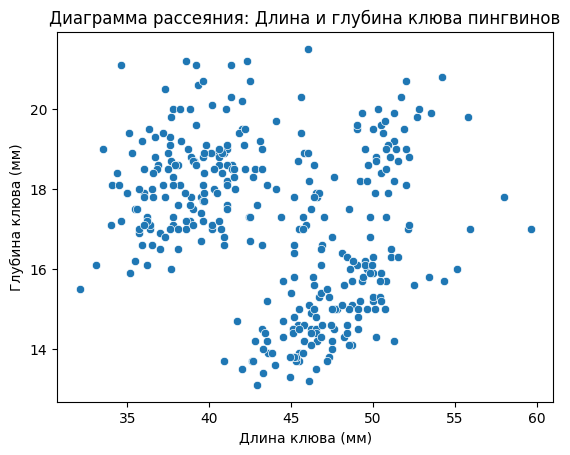

In [ ]:
# Построение диаграммы рассеяния для bill_length_mm и bill_depth_mm
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')

plt.title('Диаграмма рассеяния: Длина и глубина клюва пингвинов')
plt.xlabel('Длина клюва (мм)')
plt.ylabel('Глубина клюва (мм)')

plt.show()

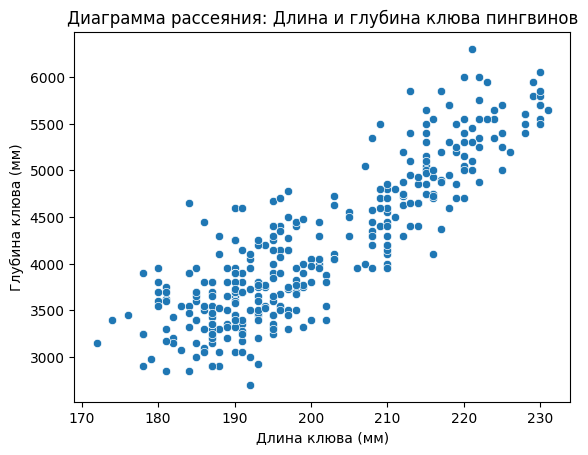

In [ ]:
# Построение диаграммы рассеяния для bill_length_mm и bill_depth_mm
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g')

plt.title('Диаграмма рассеяния: Длина и глубина клюва пингвинов')
plt.xlabel('Длина клюва (мм)')
plt.ylabel('Глубина клюва (мм)')

plt.show()

In [ ]:
penguins.rename(columns={
    'bill_length_mm': 'bill_length',
    'bill_depth_mm': 'bill_depth',
    'flipper_length_mm': 'flip_length',
    'body_mass_g': 'mass',
}, inplace=True)

# Вывод измененного DataFrame
print(penguins.head())

  species     island  bill_length  bill_depth  flip_length    mass     sex
0  Adelie  Torgersen         39.1        18.7        181.0  3750.0    Male
1  Adelie  Torgersen         39.5        17.4        186.0  3800.0  Female
2  Adelie  Torgersen         40.3        18.0        195.0  3250.0  Female
3  Adelie  Torgersen          NaN         NaN          NaN     NaN     NaN
4  Adelie  Torgersen         36.7        19.3        193.0  3450.0  Female
